# Contact distance analysis with Google Colaboratory

This notebook describes a basic analysis for the contact distribution analysis.
See the manuscript (under prep.) for the detailed explanation.

## 1.	Download the data and store as a DataFrame object




In [1]:
# Download the inpute data from GitHub
!git clone https://github.com/rnakato/Springer_contact_distance_plot.git
!mv Springer_contact_distance_plot/*txt.gz ./

Cloning into 'Springer_contact_distance_plot'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 66 (delta 0), reused 2 (delta 0), pack-reused 63
Receiving objects: 100% (66/66), 216.43 MiB | 33.66 MiB/s, done.
Resolving deltas: 100% (25/25), done.
Updating files: 100% (9/9), done.
Encountered 3 file(s) that should have been pointers, but weren't:
	merged_nodups.HAP1-A.txt.gz
	merged_nodups.SCC4KO-A.txt.gz
	merged_nodups.WaplKO_3.3-A.txt.gz


In [2]:
# Check the download file
!ls -lh

total 216M
-rw-r--r-- 1 root root  72M Mar 13 05:12 merged_nodups.HAP1-A.txt.gz
-rw-r--r-- 1 root root  73M Mar 13 05:12 merged_nodups.SCC4KO-A.txt.gz
-rw-r--r-- 1 root root  72M Mar 13 05:12 merged_nodups.WaplKO_3.3-A.txt.gz
drwxr-xr-x 1 root root 4.0K Mar 11 13:25 sample_data
drwxr-xr-x 3 root root 4.0K Mar 13 05:12 Springer_contact_distance_plot


In [3]:
!zcat merged_nodups.HAP1-A.txt.gz | head -n3

0 chr1 12659 0 16 chr1 13525 0 0 27S73M ACTTAGGGAGGCTGAGGCAAGAGGATCGATCACACTCTTGTGAGTGTCCCCAGTGTTGCAGAGGTGAGAGGAGAGTAGACAGTGAGTGGGCGTGGCGTCG 0 98M TTCTCACTGCCTTTTGTCTGCCCAGTTTCACCAGAAGTAGGCCTCTTCCTGACAGGCAGCTGCACCACTGCCTGGCGCTGTGCCCTTCCTTTGCTCTG SRR5266584.18766 SRR5266584.18766 
0 chr1 13385 0 16 chr1 13781 0 0 100M GCCTTTTCCTTTCCCTAGAGCCTCCACCACCCCAAGATCACATTTCTCACTGCCTTTTGTCTGCCCAGTTTCACCAGAAGTAGGCCTCTTCCTGACAGGC 0 98M CTGGCCATCCGTGAGATCTTCCCAGGGCAGCTCCCCTCTGTGGAATCCAATCTGTCTTCCATCCTGCGTGGCCGAGGGCCAGGCTTCTCACTGGGCCT SRR5266584.4766782 SRR5266584.4766782 
0 chr1 15614 0 0 chr1 17861 1 0 98M CAGGCAGGAGGGCTGAGGACCTCTGGTGGCGGCCCAGGGCTTCCAGCATGTGCCCTAGGGGAAGCAGGGGCCAGCTGGCAAGAGCAGGGGGTGGGCAG 0 97M3S CCCCAGTATCCAGTCCTCCTGGTGTGTGACAGGCTATATGCGCGGCCAGCAGACCTGCAGGGCCCGCTCGTCCAGGGGGCGGTGCTTGCTCTGGATCGAT SRR5266584.54669890 SRR5266584.54669890 


In [4]:
import polars as pl

df = pl.read_csv("merged_nodups.HAP1-A.txt.gz", separator=" ",
                 truncate_ragged_lines=True, has_header=False)
df.head()

column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17
i64,str,i64,i64,i64,str,i64,i64,i64,str,str,i64,str,str,str,str,str
0,"""chr1""",12659,0,16,"""chr1""",13525,0,0,"""27S73M""","""ACTTAGGGAGGCTG…",0,"""98M""","""TTCTCACTGCCTTT…","""SRR5266584.187…","""SRR5266584.187…",null
0,"""chr1""",13385,0,16,"""chr1""",13781,0,0,"""100M""","""GCCTTTTCCTTTCC…",0,"""98M""","""CTGGCCATCCGTGA…","""SRR5266584.476…","""SRR5266584.476…",null
0,"""chr1""",15614,0,0,"""chr1""",17861,1,0,"""98M""","""CAGGCAGGAGGGCT…",0,"""97M3S""","""CCCCAGTATCCAGT…","""SRR5266584.546…","""SRR5266584.546…",null
0,"""chr1""",14800,0,16,"""chr1""",18042,1,0,"""98M""","""CACCAGCCCCAGGT…",0,"""11S89M""","""GTTGAAGAGATGAT…","""SRR5266584.268…","""SRR5266584.268…",null
0,"""chr1""",13435,0,0,"""chr1""",182818,55,0,"""100M""","""TGCCTTTTGTCTGC…",0,"""98M""","""ACCTGCCGTCTGCT…","""SRR5266584.598…","""SRR5266584.598…",null


## 2. Plot the contact distance distribution

In [5]:
# Filter rows
filtered_df = df.filter((df['column_2'] == df['column_6']) &
                        (df['column_9'] >= 30) &
                        (df['column_12'] >= 30))

# Calculate the absolute difference between the positions
diffs = (filtered_df['column_3'] - filtered_df['column_7']).abs()

# Convert the Series of absolute differences to a list for plotting
diffs_list = diffs.to_list()

In [6]:
bin_size = 50000
max_diff = diffs.max()
bins = pl.Series(name="bins", values=range(0, max_diff + bin_size, bin_size))

# Use vectorized operations to find the bin index for each value
binned_diffs = (diffs // bin_size) * bin_size
binned_diffs_df = pl.DataFrame({"binned_diffs": binned_diffs})

# Count the occurrences of each bin
bin_counts = binned_diffs_df.group_by("binned_diffs").agg(pl.count()).sort("binned_diffs")

bin_counts = bin_counts.with_columns(
    (bin_counts["count"] / bin_counts["count"].sum()).alias("probability")
)

bin_counts.columns = ['distance', 'contact', 'probability']

In [7]:
bin_counts.head()

distance,contact,probability
i64,u32,f64
0,344598,0.395849
50000,54821,0.062974
100000,37346,0.0429
150000,28893,0.03319
200000,23603,0.027113


/usr/local/lib/python3.10/dist-packages/seaborn/_core/data.py:275: UserWarning: DataFrame interchange with pandas<2.0.2 has some known issues. You are using pandas 1.5.3. Continuing, but it is recommended to carefully inspect the results and to consider upgrading.
  data = convert_dataframe_to_pandas(data)


([<matplotlib.axis.YTick at 0x7926786e6770>,
 [Text(0, 1.0, '1'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.01, '0.01'),
  Text(0, 0.001, '0.001'),
  Text(0, 0.0001, '0.0001'),
  Text(0, 1e-05, '0.00001'),
  Text(0, 1e-06, '0.000001')])

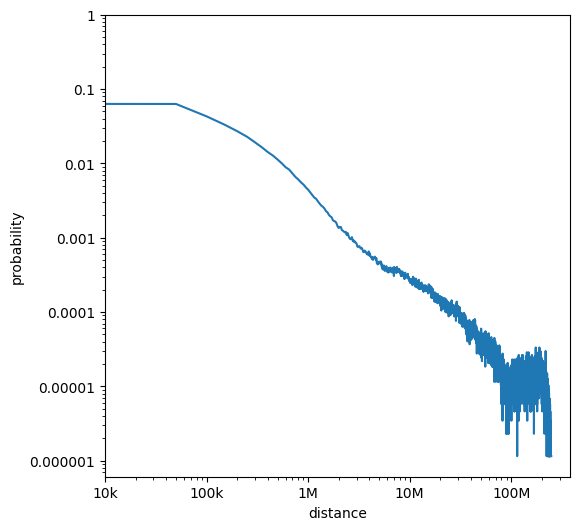

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

problist = bin_counts[['distance', 'probability']]

# Plotting
plt.figure(figsize=(6, 6))
sns.lineplot(data=problist, x='distance', y='probability')
plt.xscale('log')
plt.yscale('log')
plt.xticks([10000, 100000, 1000000, 10000000, 100000000],
           ['10k', '100k', '1M', '10M', '100M'])
plt.yticks([1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
           ['1', '0.1', '0.01', '0.001', '0.0001', '0.00001', '0.000001'])

## 3. Compare the distance distribution between Hi-C samples

In [9]:
bin_counts_Control = bin_counts

In [10]:
# SCC4KO
df = pl.read_csv("merged_nodups.SCC4KO-A.txt.gz", separator=" ",
                  truncate_ragged_lines=True, has_header=False)

filtered_df = df.filter((df['column_2'] == df['column_6']) &
                         (df['column_9'] >= 30) &
                         (df['column_12'] >= 30))

diffs = (filtered_df['column_3'] - filtered_df['column_7']).abs()
diffs_list = diffs.to_list()
bins = pl.Series(name="bins", values=range(0, max_diff + bin_size, bin_size))
binned_diffs = (diffs // bin_size) * bin_size
binned_diffs_df = pl.DataFrame({"binned_diffs": binned_diffs})
bin_counts = binned_diffs_df.group_by("binned_diffs").agg(pl.count()).sort("binned_diffs")

bin_counts = bin_counts.with_columns(
    (bin_counts["count"] / bin_counts["count"].sum()).alias("probability")
)

bin_counts.columns = ['distance', 'contact', 'probability']
bin_counts_SCC4KO = bin_counts

In [11]:
# WAPLKO
df = pl.read_csv("merged_nodups.WaplKO_3.3-A.txt.gz", separator=" ",
                  truncate_ragged_lines=True, has_header=False)

filtered_df = df.filter((df['column_2'] == df['column_6']) &
                         (df['column_9'] >= 30) &
                         (df['column_12'] >= 30))

diffs = (filtered_df['column_3'] - filtered_df['column_7']).abs()
diffs_list = diffs.to_list()
bins = pl.Series(name="bins", values=range(0, max_diff + bin_size, bin_size))
binned_diffs = (diffs // bin_size) * bin_size
binned_diffs_df = pl.DataFrame({"binned_diffs": binned_diffs})
bin_counts = binned_diffs_df.group_by("binned_diffs").agg(pl.count()).sort("binned_diffs")

bin_counts = bin_counts.with_columns(
    (bin_counts["count"] / bin_counts["count"].sum()).alias("probability")
)

bin_counts.columns = ['distance', 'contact', 'probability']
bin_counts_WAPLKO = bin_counts

/usr/local/lib/python3.10/dist-packages/seaborn/_core/data.py:275: UserWarning: DataFrame interchange with pandas<2.0.2 has some known issues. You are using pandas 1.5.3. Continuing, but it is recommended to carefully inspect the results and to consider upgrading.
  data = convert_dataframe_to_pandas(data)
/usr/local/lib/python3.10/dist-packages/seaborn/_core/data.py:275: UserWarning: DataFrame interchange with pandas<2.0.2 has some known issues. You are using pandas 1.5.3. Continuing, but it is recommended to carefully inspect the results and to consider upgrading.
  data = convert_dataframe_to_pandas(data)
/usr/local/lib/python3.10/dist-packages/seaborn/_core/data.py:275: UserWarning: DataFrame interchange with pandas<2.0.2 has some known issues. You are using pandas 1.5.3. Continuing, but it is recommended to carefully inspect the results and to consider upgrading.
  data = convert_dataframe_to_pandas(data)


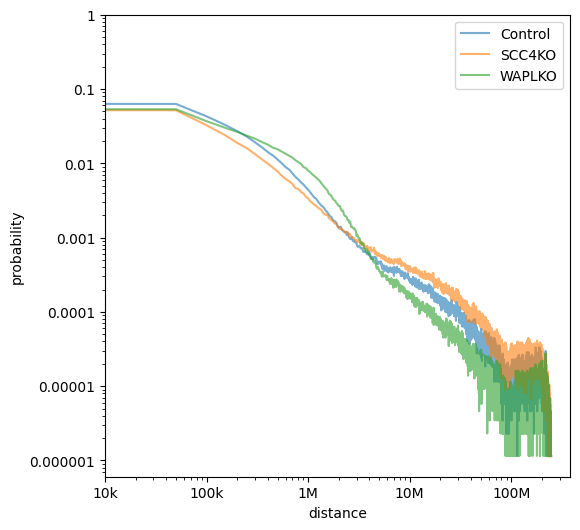

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

problist_Control = bin_counts_Control[['distance', 'probability']]
problist_SCC4KO = bin_counts_SCC4KO[['distance', 'probability']]
problist_WAPLKO = bin_counts_WAPLKO[['distance', 'probability']]

# Plotting
plt.figure(figsize=(6, 6))
sns.lineplot(data=problist_Control, x='distance', y='probability', alpha=0.6, label="Control")
sns.lineplot(data=problist_SCC4KO, x='distance', y='probability', alpha=0.6, label="SCC4KO")
sns.lineplot(data=problist_WAPLKO, x='distance', y='probability', alpha=0.6, label="WAPLKO")
plt.xscale('log')
plt.yscale('log')
plt.xticks([10000, 100000, 1000000, 10000000, 100000000],
           ['10k', '100k', '1M', '10M', '100M'])
plt.yticks([1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
           ['1', '0.1', '0.01', '0.001', '0.0001', '0.00001', '0.000001'])
plt.legend()

## 4.	Fast computation of the distance distribution


In [13]:
# If you have not cloned or have removed the GitHub repository, type the following command (again)
# !git clone https://github.com/rnakato/Springer_contact_distance_plot.git

!mv Springer_contact_distance_plot/distance_vs_count.Juicer* ./

In [14]:
!./distance_vs_count.Juicer

Usage: distance_vs_count.Juicer <file> <winsize> <MAPQ>
       <file>:    Input file  (merged_nodups.txt.gz)
       <winsize>: window size (default: 50000)
       <MAPQ>:    MAPQ threshold (default: 30)


In [15]:
!./distance_vs_count.Juicer merged_nodups.HAP1-A.txt.gz 50000 30 > HAP1-A.distance.txt
!./distance_vs_count.Juicer merged_nodups.SCC4KO-A.txt.gz 50000 30 > SCC4KO-A.distance.txt
!./distance_vs_count.Juicer merged_nodups.WaplKO_3.3-A.txt.gz 50000 30 > WaplKO_3.3-A.distance.txt

In [16]:
!head HAP1-A.distance.txt

0 - 49999 | 344598
50000 - 99999 | 54821
100000 - 149999 | 37346
150000 - 199999 | 28893
200000 - 249999 | 23603
250000 - 299999 | 19868
300000 - 349999 | 16688
350000 - 399999 | 14326
400000 - 449999 | 12370
450000 - 499999 | 11073


In [17]:
import pandas as pd

def get_distancedata(filename):
  data = []
  with open(filename, 'r') as file:
      for line in file:
          parts = line.split('|')
          distance = parts[0].split('-')[0].strip()  # Taking the lower bound of the distance range
          count = int(parts[1].strip())
          data.append((int(distance), count))

  df = pd.DataFrame(data, columns=['distance', 'count'])

  df['probability'] = df['count'] / df['count'].sum()

  return df

In [18]:
df_Control = get_distancedata('HAP1-A.distance.txt')
df_SCC4KO  = get_distancedata('SCC4KO-A.distance.txt')
df_WaplKO  = get_distancedata('WaplKO_3.3-A.distance.txt')

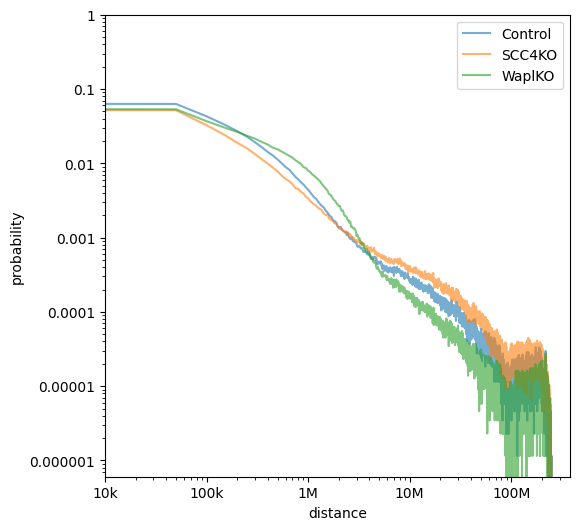

In [19]:
plt.figure(figsize=(6, 6))
sns.lineplot(data=df_Control, x='distance', y='probability', alpha=0.6, label="Control")
sns.lineplot(data=df_SCC4KO, x='distance', y='probability', alpha=0.6, label="SCC4KO")
sns.lineplot(data=df_WaplKO, x='distance', y='probability', alpha=0.6, label="WaplKO")

plt.xscale('log')
plt.yscale('log')

plt.xticks([10000, 100000, 1000000, 10000000, 100000000],
           ['10k', '100k', '1M', '10M', '100M'])
plt.yticks([1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
           ['1', '0.1', '0.01', '0.001', '0.0001', '0.00001', '0.000001'])

plt.legend()

## 5.	Plot the distance distribution with log-spaced bin size

In [20]:
!./distance_vs_count.Juicer.log

Usage: distance_vs_count.Juicer.log <file> <MAPQ>
       <file>:    Input file  (merged_nodups.txt)
       <MAPQ>:    MAPQ threshold (default: 30)


In [21]:
!./distance_vs_count.Juicer.log merged_nodups.HAP1-A.txt.gz 30 > HAP1-A.distance.log.txt
!./distance_vs_count.Juicer.log merged_nodups.SCC4KO-A.txt.gz 30 > SCC4KO-A.distance.log.txt
!./distance_vs_count.Juicer.log merged_nodups.WaplKO_3.3-A.txt.gz 30 > WaplKO_3.3-A.distance.log.txt

In [22]:
!head HAP1-A.distance.log.txt

31 - 38 | 58
39 - 49 | 67
50 - 62 | 91
63 - 78 | 109
79 - 99 | 178
100 - 124 | 285
125 - 157 | 898
158 - 198 | 4689
199 - 250 | 26609
251 - 315 | 60090


In [23]:
df_Control = get_distancedata('HAP1-A.distance.log.txt')
df_SCC4KO = get_distancedata('SCC4KO-A.distance.log.txt')
df_WaplKO = get_distancedata('WaplKO_3.3-A.distance.log.txt')

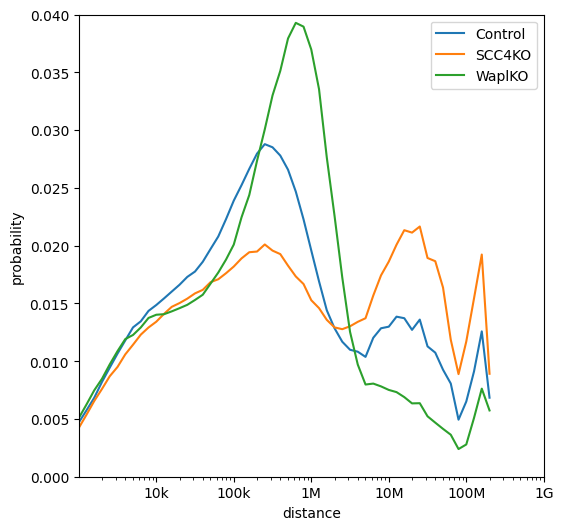

In [24]:
plt.figure(figsize=(6, 6))
sns.lineplot(data=df_Control, x='distance', y='probability', label="Control")
sns.lineplot(data=df_SCC4KO, x='distance', y='probability', label="SCC4KO")
sns.lineplot(data=df_WaplKO, x='distance', y='probability', label="WaplKO")

plt.xscale('log')

plt.xticks([10000, 100000, 1000000, 10000000, 100000000, 1000000000],
           ['10k', '100k', '1M', '10M', '100M', '1G'])

plt.xlim([1000, 1000000000])
plt.ylim([0, 0.04])
plt.legend()

### Plot Probability Differences

In [25]:
df_SCC4KO['probability_diff'] = df_SCC4KO['probability'] - df_Control['probability']
df_WaplKO['probability_diff'] = df_WaplKO['probability'] - df_Control['probability']
df_SCC4KO.head()

,distance,count,probability,probability_diff
0,31,82,0.000094,0.000027
1,39,118,0.000135,0.000058
2,50,167,0.000191,0.000086
3,63,149,0.000170,0.000045
4,79,226,0.000258,0.000054


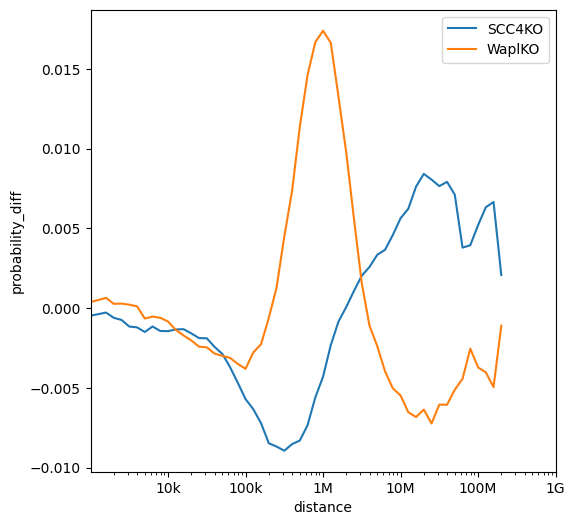

In [26]:
plt.figure(figsize=(6, 6))
sns.lineplot(data=df_SCC4KO, x='distance', y='probability_diff', label="SCC4KO")
sns.lineplot(data=df_WaplKO, x='distance', y='probability_diff', label="WaplKO")

plt.xscale('log')

plt.xticks([10000, 100000, 1000000, 10000000, 100000000, 1000000000],
           ['10k', '100k', '1M', '10M', '100M', '1G'])

plt.xlim([1000, 1000000000])
plt.legend()

### View probability as a heatmap

In [29]:
dfarray = []

for sample in ['HAP1-A', 'SCC4KO-A', 'WaplKO_3.3-A']:
    df = get_distancedata(sample + '.distance.log.txt')
    df.index = df['distance']
    df.columns = ['distance', 'count', sample]
    df = df[sample]
    dfarray.append(df)

dfarray = pd.concat(dfarray, axis=1)
dfarray = dfarray.T

distance,31,39,50,63,79,100,125,158,199,251,...,25118864,31622776,39810717,50118723,63095734,79432823,100000000,125892541,158489319,199526231
HAP1-A,0.000067,0.000077,0.000105,0.000125,0.000204,0.000327,0.001032,0.005387,0.030570,0.069035,...,0.013604,0.011286,0.010742,0.009263,0.008066,0.004939,0.006511,0.009121,0.012582,0.006841
SCC4KO-A,0.000094,0.000135,0.000191,0.000170,0.000258,0.000454,0.001233,0.006338,0.032441,0.067459,...,0.021663,0.018939,0.018659,0.016378,0.011858,0.008884,0.011706,0.015447,0.019236,0.008913
WaplKO_3.3-A,0.000060,0.000089,0.000129,0.000148,0.000179,0.000339,0.000989,0.004867,0.027008,0.062629,...,0.006365,0.005231,0.004681,0.004143,0.003634,0.002396,0.002792,0.005094,0.007625,0.005739


In [38]:
dfarray

distance,31,39,50,63,79,100,125,158,199,251,...,25118864,31622776,39810717,50118723,63095734,79432823,100000000,125892541,158489319,199526231
HAP1-A,0.000067,0.000077,0.000105,0.000125,0.000204,0.000327,0.001032,0.005387,0.030570,0.069035,...,0.013604,0.011286,0.010742,0.009263,0.008066,0.004939,0.006511,0.009121,0.012582,0.006841
SCC4KO-A,0.000094,0.000135,0.000191,0.000170,0.000258,0.000454,0.001233,0.006338,0.032441,0.067459,...,0.021663,0.018939,0.018659,0.016378,0.011858,0.008884,0.011706,0.015447,0.019236,0.008913
WaplKO_3.3-A,0.000060,0.000089,0.000129,0.000148,0.000179,0.000339,0.000989,0.004867,0.027008,0.062629,...,0.006365,0.005231,0.004681,0.004143,0.003634,0.002396,0.002792,0.005094,0.007625,0.005739


[None, None, None, None, None, None]

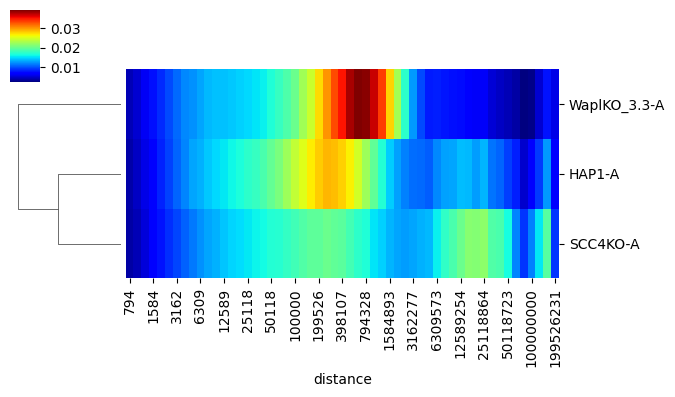

In [30]:
g = sns.clustermap(dfarray.iloc[:,14:70], cmap='jet', figsize=(6, 4), col_cluster=False)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)